In [1]:
import cv2 as cv
from pyzbar import pyzbar
import matplotlib.pyplot as plt

In [3]:
def detect_qr_from_camera():
    cap = cv.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Không thể đọc khung hình từ camera.")
            break

        qrCodes = pyzbar.decode(frame)
        for qrCode in qrCodes:
            (x, y, w, h) = qrCode.rect
            cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
            qrCodeData = qrCode.data.decode("utf-8")
            qrCodeType = qrCode.type
            text = "{} - {}".format(qrCodeData, qrCodeType)
            print(text)
            cv.putText(frame, text, (x-10, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

        cv.imshow("Camera", frame)
        if cv.waitKey(1) == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()

In [4]:
def detect_qr_from_image(image_path):
    image = cv.imread(image_path)
    if image is None:
        print("Không thể đọc ảnh từ đường dẫn được cung cấp.")
        return

    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    equalized = cv.equalizeHist(gray)
    blurred = cv.GaussianBlur(equalized, (5, 5), 0)

    # Hiển thị ảnh gốc
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Hiển thị ảnh sau khi áp dụng bộ lọc
    plt.subplot(1, 2, 2)
    plt.imshow(blurred, cmap='gray')
    plt.title('Blurred Image')
    plt.axis('off')

    plt.show()

    qrCodes = pyzbar.decode(blurred)

    if len(qrCodes) == 0:
        print("Không tìm thấy mã QR trong ảnh.")
        return

    for qrCode in qrCodes:
        (x, y, w, h) = qrCode.rect
        cv.rectangle(image, (x, y), (x+w, y+h), (0, 255, 255), 2)
        qrCodeData = qrCode.data.decode("utf-8")
        qrCodeType = qrCode.type
        text = "{} - {}".format(qrCodeData, qrCodeType)
        print(text)
        cv.putText(image, text, (x-10, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

    cv.imshow("Phat hien QR code", image)

    key = cv.waitKey(0)

    if key == ord('q'):
        cv.destroyAllWindows()


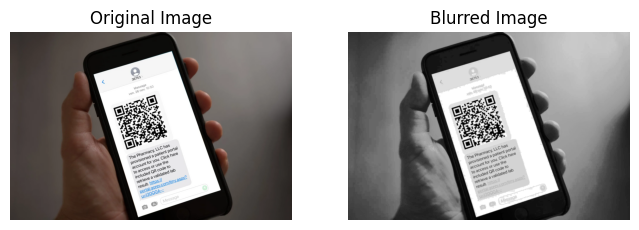

https://www.thepharmacyatwellington.com/rapid-tests-available - QRCODE


In [5]:
detect_qr_from_image("./Img/case9.png")

In [22]:
detect_qr_from_camera()